# **Código Modelo Supervisionado | Vinhos**

CRUZAR O ANO DO VINHO x PREÇO DO VINHO = NOTA DO VINHO
x o que eu mostro -> y

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split #SEPARAÇÃO ENTRE TREINO E TESTE
from sklearn.linear_model import LinearRegression #REGRESSÃO LINEAR UTILIZADA PARA TER UMA PREVISÃO NÚMERICA
from sklearn.metrics import mean_squared_error #UTILIZADO PARA A MÉDIA DE ERRO ENTRE O REAL E O PREVISTO

In [ ]:
df = pd.read_csv('red_wine4_30.csv', encoding = 'latin-1' )
df

,Unnamed: 0,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
0,1,Merlot,2019,United States,California,Crane Lake,3.6,30,4.99
1,2,Cabernet Sauvignon,2011,United States,Columbia Valley,Hogue,3.3,76,4.95
2,3,Hot To Trot Smooth Red Blend,2013,United States,Columbia Valley,14 Hands,3.7,3917,4.99
3,4,Cabernet Sauvignon,2010,Chile,Maule Valley,Aromo,3.0,189,4.99
4,5,Loggia del Conte Chianti,2016,Italy,Chianti,Le Chiantigiane,3.3,149,4.99
...,...,...,...,...,...,...,...,...,...
10378,13378,Borro del Diavolo Riserva Chianti Classico,2017,Italy,Chianti Classico,Ormanni,3.9,94,29.75
10379,13379,Alsace Rouge,2019,France,Alsace,Marcel Deiss,3.8,41,29.99
10380,13380,Malbec,2016,Argentina,Mendoza,Mariflor,4.1,914,30.00
10381,13381,Grand Mère Pinot Noir,2018,Argentina,Uco Valley,Domaine Nico,4.3,215,29.56


In [ ]:
#SEPARAÇÃO DE TREINO E TESTE
xtreino, xteste, ytreino, yteste = train_test_split(df[['wine_year','wine_price']], df['wine_rating'], test_size = 0.32, random_state = 33)

In [ ]:
#CONSTRUÇÃO DO MODELO (GRÁFICO DE VISUALIZAÇÃO)
mod = LinearRegression()
mod.fit(xtreino, ytreino) #VAI ADEQUAR O XTREINO E YTREINO AO MODELO DE REGRESSÃO LINEAR

LinearRegression()

In [ ]:
#AVALIAÇÃO DE MODELO
yprevisto = mod.predict(xteste) #PREVISÃO DO XTESTE
mean_squared_error(yteste, yprevisto) #COMPARAÇÃO DO REAL COM O PREVISTO

0.04080511258793057

In [ ]:
ev = pd.DataFrame({'Previsão':yprevisto,'Real':yteste})
ev.head(10)

,Previsão,Real
253,3.533636,3.5
2052,3.648381,3.9
3695,3.715357,3.3
630,3.591961,3.9
6594,3.847756,3.7
5958,3.787715,3.7
6489,3.833627,3.8
9552,3.913459,3.9
6112,3.795025,3.6
8700,3.920890,3.9


In [ ]:
ev['ERRO ABSOLUTO'] = (yprevisto - yteste) / yteste
ev

,Previsão,Real,ERRO ABSOLUTO
253,3.533636,3.5,0.009610
2052,3.648381,3.9,-0.064518
3695,3.715357,3.3,0.125866
630,3.591961,3.9,-0.078984
6594,3.847756,3.7,0.039934
...,...,...,...
2146,3.591840,3.7,-0.029232
4536,3.753723,3.5,0.072492
62,3.489555,3.2,0.090486
6314,3.829138,3.9,-0.018170


array([[<Axes: title={'center': 'ERRO ABSOLUTO'}>]], dtype=object)

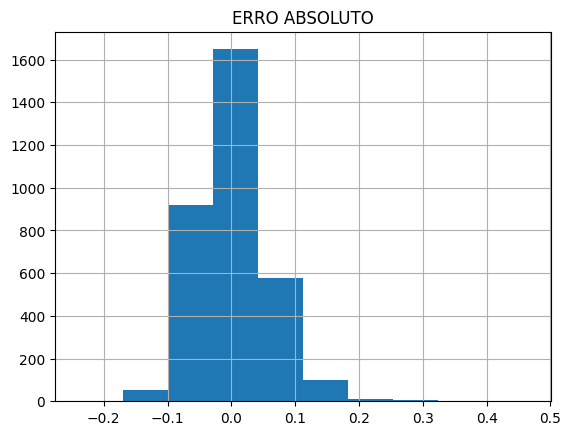

In [ ]:
ev.hist('ERRO ABSOLUTO')

<Axes: xlabel='Previsão', ylabel='Previsão'>

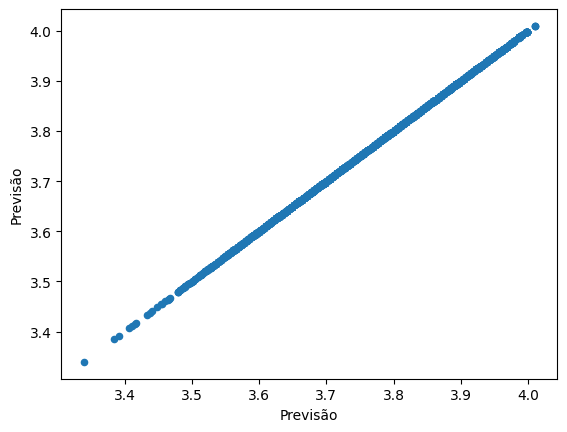

In [ ]:
ev.plot.scatter(x = 'Previsão', y = 'Previsão')

<Axes: xlabel='Previsão', ylabel='Real'>

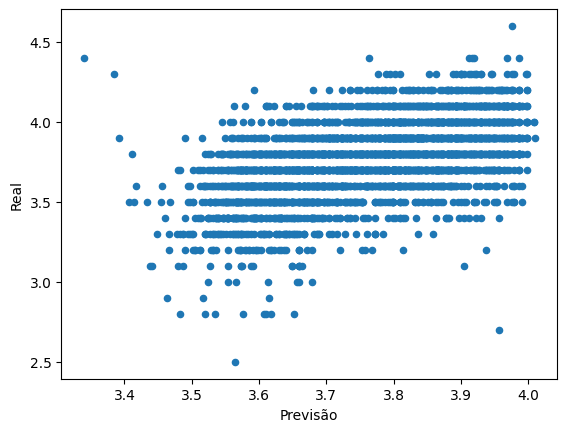

In [ ]:
ev.plot.scatter(x = 'Previsão', y = 'Real')